# Problem statement.

Build a recommender system by using cosine simillarties score.



# Importing Libraries

In [51]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#read the dataset & check shape of data
book_df=pd.read_csv('book.csv',)
book_df.drop('Unnamed: 0',inplace=True,axis=1)
print(book_df.shape)
book_df

(10000, 3)


,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


# EDA 

In [53]:
#rename some column names
book_df.rename(columns={'User.ID':'UserId','Book.Title':'Books','Book.Rating':'Rating'},inplace=True)

In [54]:
#sort values by userID
book_df.sort_values('UserId').head(10)


,UserId,Books,Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2406,9,The Book of Kells: Selected Plates in Full Color,6
2407,10,SINGLE &amp; SINGLE,6
2408,12,Apocalypse Wow,10


In [55]:
#check information about data
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserId  10000 non-null  int64 
 1   Books   10000 non-null  object
 2   Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [56]:
#check missing values
book_df.isnull().sum()

UserId    0
Books     0
Rating    0
dtype: int64

#### There are no any missing values.

In [57]:
#generate Descriptive statistics
book_df.describe()

,UserId,Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [58]:
# Check number of unique users in the dataset
book_df.UserId.nunique()

2182

In [59]:
#counts of unique rows in the DataFrame.
book_df['Rating'].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

#### Average Rating is 8.


In [60]:
#Check unique books
book_df.Books.unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [61]:
# Check length of unique Books.
len(book_df.Books.unique())

9659

In Book Dataset There are 9659 unique boooks.

In [62]:
#It gives most rated books
book_df.Books.value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Books, Length: 9659, dtype: int64

#### 'Fahrenheit 451' is most rated book.

In [63]:
#calculated higher rated book
book_df.groupby('Rating').agg(['max']).reset_index()


,Rating,UserId,Books
,,max,max
0,1,278759,Welcome to the Funny Farm: The All-True Misadv...
1,2,278764,With Heart
2,3,278820,Zen: A Way of Life (Teach Yourself Books)
3,4,278723,Ã?Â?bermorgen.
4,5,278851,stardust
5,6,278854,Zombies of the Gene Pool
6,7,278854,iI Paradiso Degli Orchi
7,8,278854,"\Surely You're Joking, Mr. Feynman!\: Adventur..."
8,9,278849,"\Well, there's your problem\: Cartoons"


## Correlation Analysis & visualization

In [64]:
book_df.corr()

,UserId,Rating
UserId,1.000000,-0.041523
Rating,-0.041523,1.000000


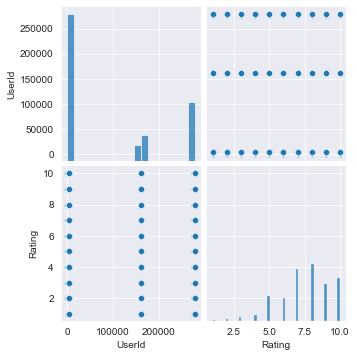

In [65]:
#plot pairplot to check correlation between features
sns.set_style(style='darkgrid')
sns.pairplot(book_df)

<AxesSubplot:>

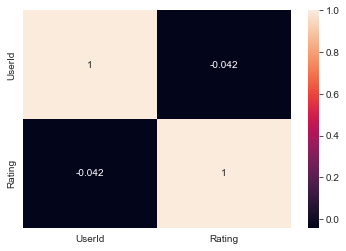

In [66]:
#Generate a heatmap to check correlation
sns.heatmap(book_df.corr(),annot=True,xticklabels=True)

## Build a recommender system by using cosine simillarties score.  

In [69]:
#Make sparse Matrix
#DataFrame.pivot : Pivot without aggregation that can handle non-numeric data.But it can't handle duplicate values.
#DataFrame.pivot_table : Generalization of pivot that can handle duplicate values for one index/column pair.
user_book_df=book_df.pivot_table(index='UserId',columns='Books',values='Rating')
user_book_df

Books,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [70]:
#Impute those NaNs with 0 values (0 means that person not read a book or not gives ratings to the book)
user_book_df.fillna(0, inplace=True)
user_book_df

Books,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [71]:
#Import Libraries
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [72]:
#Calculating Cosine Similarity between Users
user_sim = 1 - pairwise_distances(user_book_df.values, metric='cosine')
# 1 - to get similarities bcs pairwase give dissimilarity.
#by default metric=eucledien
# pairwise distance gives dissimilarities ....but we want similarities so we do 1-pairwise distance

In [73]:
#we make dataframe of similarity (array)
user_sim   

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [74]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Diagonaly 1 bcz feature itself have similarity is 1

#### In columns we have indexes but we want USERID

In [76]:
#Set UserId to index and column names. 
user_sim_df.index = book_df.UserId.unique()
user_sim_df.columns = book_df.UserId.unique()

In [77]:
user_sim_df.index

Int64Index([276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748,
            276751, 276754,
            ...
            162085, 162091, 162092, 162095, 162103, 162107, 162109, 162113,
            162121, 162129],
           dtype='int64', length=2182)

In [88]:
user_sim_df.columns

Int64Index([276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748,
            276751, 276754,
            ...
            162085, 162091, 162092, 162095, 162103, 162107, 162109, 162113,
            162121, 162129],
           dtype='int64', length=2182)

In [89]:
#Here we set the UserId to the columns
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
#see 15 rows & 15 columns bcz sparse matrix is too big
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [91]:
# fill digonal values is equal to 0(bcz digonally we get similarity of features with itself that is always equal to 1.)
np.fill_diagonal(user_sim,0)
user_sim_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [92]:
# We check Most Similar Users In 5 columns.
user_sim_df.idxmax(axis=1)[0:5] #idmax gives similar columns

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

#### UserId 276729 & 276726 have similarities also UserId 276736 & 276726, UserId 276737 & 276726, UserId 276744 & 276726 have Similarity.

#### For similar users we can easily recomend the Books.

In [93]:
# apply OR gate
book_df[(book_df['UserId']==276726) | (book_df['UserId']==276729)] 

,UserId,Books,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6


#### UserId 276729 & 276726 have similarities,

#### From above observation for UserId 276726 we recommend the books that are Read & Rated by userId 276729 and vice versa.

In [84]:
# apply OR gate
book_df[(book_df['UserId']==276726) | (book_df['UserId']==276736)] 

,UserId,Books,Rating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


#### UserId 276726 & 276736 have similarities,

#### From above observation for UserId 276726 we recommend the books that are Read & Rated by userId 276736 and vice versa.

In [85]:
# apply OR gate
book_df[(book_df['UserId']==276726) | (book_df['UserId']==276737)] 

,UserId,Books,Rating
0,276726,Classical Mythology,5
4,276737,The Mummies of Urumchi,6


#### UserId 276737 & 276726 have similarities,

#### From above observation for UserId 276726 we recommend the books that are Read & Rated by userId 276737 and vice versa.

In [86]:
# apply OR gate
book_df[(book_df['UserId']==276726) | (book_df['UserId']==276744)] 

,UserId,Books,Rating
0,276726,Classical Mythology,5
5,276744,The Kitchen God's Wife,7


#### UserId 276744 & 276726 have similarities,

#### From above observation for UserId 276726 we recommend the books that are Read & Rated by userId 276744 and vice versa.

### Similarlly we can check All the similar Users In whole dataset and recommend Books to similar Users.